In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

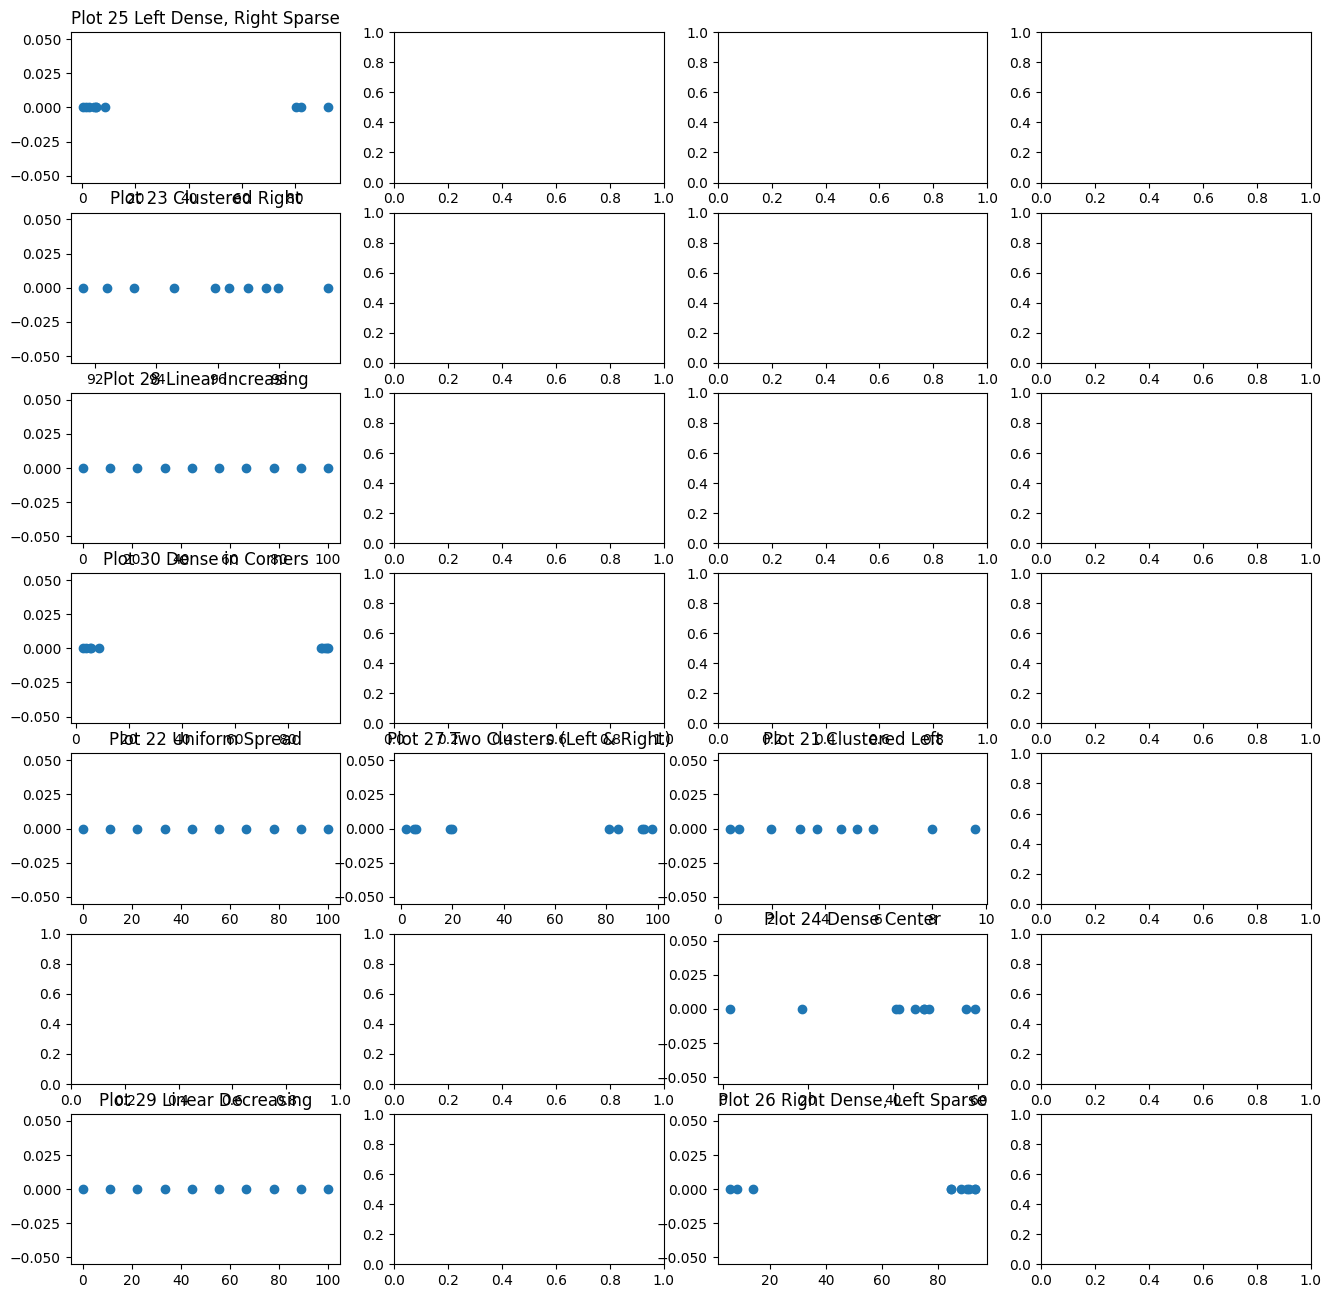

In [8]:
DATA_PATH = "scatter_data"

plots = os.listdir(DATA_PATH)
COLS = 4
ROWS = len(plots) // 4 + 1

fig, axs = plt.subplots(ROWS, COLS, figsize=(16,16))

datas = {}

for idx, plot in enumerate(plots):
    name = int(plot.split(".")[0])
    if name < 20:
        continue
    data = json.load(
            open(os.path.join(DATA_PATH , plot), "r"))

    datas[name] = data 

    axs[idx // COLS][idx % COLS].scatter(data["x"], data["y"])
    axs[idx // COLS][idx % COLS].set_title(f"Plot {name} {data['description']}")
    
def plot_four(datasets, idxs, show_correct = None):
        fig, axes = plt.subplots(2, 2, figsize=(8, 8))

        for i, ax in enumerate(axes.flat):
                ax.scatter(datasets[idxs[i]]["x"],datasets[idxs[i]]["y"])
                ax.set_title(f"Plot {i + 1}")
                ax.grid(True)

                if show_correct is not None:
                        for spine in ax.spines.values():
                                if idxs[i] == show_correct:
                                        spine.set_linewidth(2)
                                        spine.set_color("green")
                                else:
                                        spine.set_color("red")


        plt.tight_layout()

In [9]:
questions = []

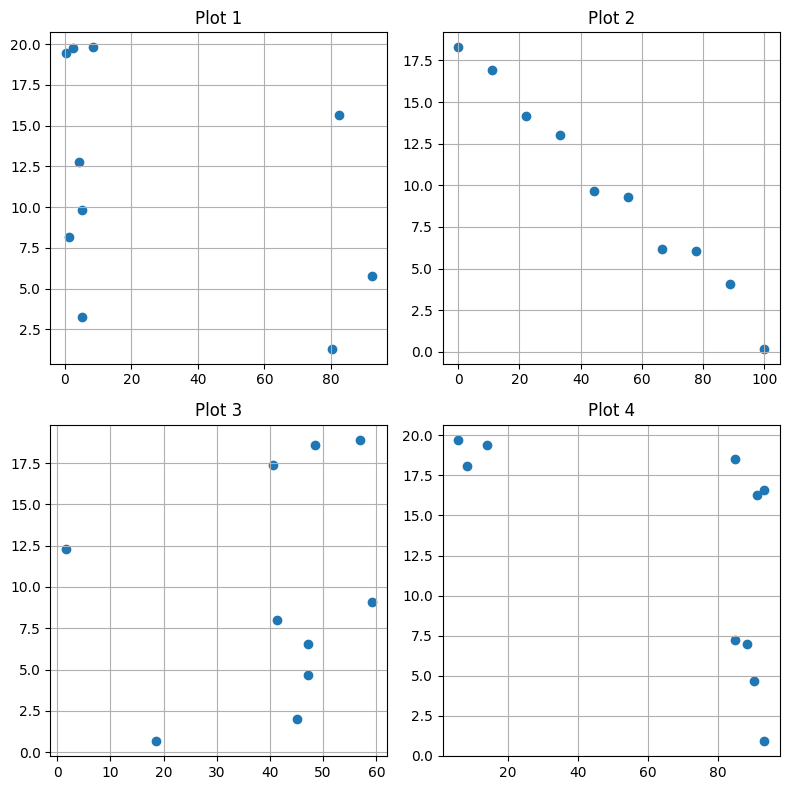

In [10]:
plots = [
    25,
    29,
    24,
    26 
]

correct = 26 

ttype = "question"
description = "Test if they can distinguish different densities"

plot_four(datas , plots)

In [40]:
questions.append({
    "description":description,
    "ttype":ttype,
    "plots":plots,
    "answer":correct
})

In [41]:
questions

[{'description': 'Can they distinguish the shape of a dip',
  'ttype': 'question',
  'plots': [18, 17, 19, 15],
  'answer': 17},
 {'description': 'Can they distinguish the shape of a monotonous increase',
  'ttype': 'question',
  'plots': [9, 2, 4, 6],
  'answer': 6},
 {'description': 'Test if they can distinguish vastly different shapes',
  'ttype': 'question',
  'plots': [14, 0, 3, 5],
  'answer': 5},
 {'description': 'Test if they can distinguish the shape of a monotonous decrease',
  'ttype': 'question',
  'plots': [3, 15, 10, 17],
  'answer': 10},
 {'description': 'Test if they can distinguish the shape of a step',
  'ttype': 'question',
  'plots': [6, 5, 14, 2],
  'answer': 5}]

In [42]:
open(
    "density.json", "w"
).write(json.dumps(questions, indent=2))

920